In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np

In [124]:
def value_iteration(S, A, R, gamma, V, policy, theta):
    
    while True:
        delta = 0
        for s in S:
            v = V[s]
            As = A(s)
            if As:
                V[s] = max([ sum(p * (r + gamma * V[s2]) for p, s2, r in R(s, a)) for a in As])
                delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    
    for s in S:
        As = A(s)
        policy[s] = max(As[::], key = lambda a: (round(sum(p * (r + gamma * V[s2]) for p, s2, r in R(s, a)), 10), -a)) if As else 0

In [166]:
# Gambler's problem

P_HEAD = 0.25
GOAL = 100
gamma = 1.

S = range(1 + GOAL) # $ wealth
A = lambda s: [] if s in (0, GOAL) else range(1, 1 + s) # can bet up to entire wealth

def R(s, a):
    return [ (P_HEAD, min(GOAL, s + a), int(s + a == GOAL)), (1 - P_HEAD, s - a, 0) ]


In [167]:
V = [ 0. for _ in S ]
policy = [ 1 for _ in S ]

value_iteration(S, A, R, gamma, V, policy, 1e-10)

<IPython.core.display.Javascript object>


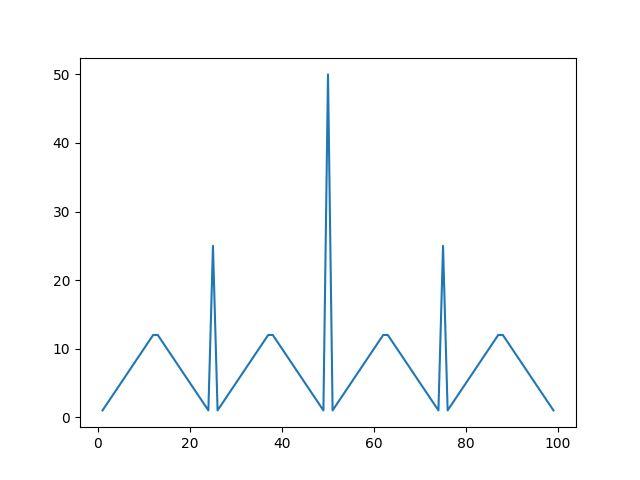

In [168]:
figure()
plot(S[1:-1], policy[1:-1])

<IPython.core.display.Javascript object>


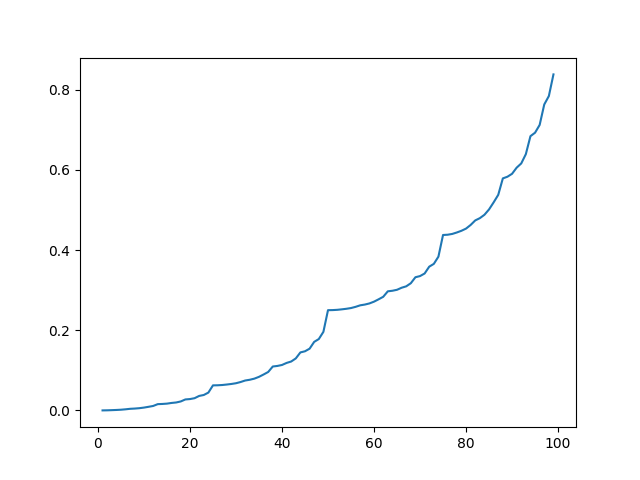

In [169]:
figure()
plot(S[1:-1], V[1:-1])

<IPython.core.display.Javascript object>


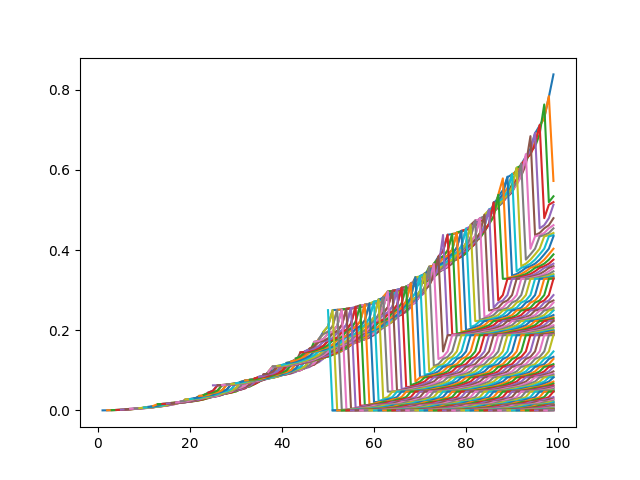

In [170]:
figure()
for a in range(1, 1 + GOAL):
    Sa = range(a, GOAL)
    plot(Sa, [ sum(p * (r + gamma * V[s2]) for p, s2, r in R(s, a)) for s in Sa ])